In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Chapter 4 Linear Models

Today we are going to cover the univariate (single variable) and multivariate linear regression model in depth:

- Model expression and assumptions
- Model input, output, parameters, and hyper-parameters
- Loss function: measure the performance of the model with given parameters
- Train a linear model: least squares method, normal equation, (batch) gradient descent and stochastic gradient descent

## Dataset: CalCOFI from Kaggle.com

Download bottle.csv from:

https://www.kaggle.com/sohier/calcofi#bottle.csv

- The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. 
- CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.
- Today we are going to use this dataset to investigate the relationship between water salinity and water temperature. In particular, we would like to predict the change of salinity based on water temperature.

In [4]:
# Load datasets
cur_path = os.getcwd()
datapath = cur_path + '/Data/'
bottle = pd.read_csv(datapath + 'bottle.csv', sep=',')
bottle.head().T

C:\Users\ch002\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4
Cst_Cnt,1,1,1,1,1
Btl_Cnt,1,2,3,4,5
Sta_ID,054.0 056.0,054.0 056.0,054.0 056.0,054.0 056.0,054.0 056.0
Depth_ID,19-4903CR-HY-060-0930-05400560-0000A-3,19-4903CR-HY-060-0930-05400560-0008A-3,19-4903CR-HY-060-0930-05400560-0010A-7,19-4903CR-HY-060-0930-05400560-0019A-3,19-4903CR-HY-060-0930-05400560-0020A-7
Depthm,0,8,10,19,20
T_degC,10.5,10.46,10.46,10.45,10.45
Salnty,33.44,33.44,33.437,33.42,33.421
O2ml_L,NaN,NaN,NaN,NaN,NaN
STheta,25.649,25.656,25.654,25.643,25.643
O2Sat,NaN,NaN,NaN,NaN,NaN


### Analyze the dataset

- show column names and data types
- compute descriptive statistics for each variable
- extract 'Salnty' and 'T_degC' for the first 500 rows. (The first 500 row were tested in March, 1949 near California coast.)
- detect and remove missing values
- draw scatter plot and compute correlation coefficient

In [5]:
# Display column names and data types
print('columns:', bottle.columns)
print('data types:', bottle.dtypes)

columns: Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')
data types: Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm            

In [7]:
# descriptive statistics of each numerical column
bottle.describe().T

,count,mean,std,min,25%,50%,75%,max
Cst_Cnt,864863.0,17138.790958,10240.949817,1.0000,8269.000000,16848.00000,26557.0000,34404.0000
Btl_Cnt,864863.0,432432.000000,249664.587267,1.0000,216216.500000,432432.00000,648647.5000,864863.0000
Depthm,864863.0,226.831951,316.050259,0.0000,46.000000,125.00000,300.0000,5351.0000
T_degC,853900.0,10.799677,4.243825,1.4400,7.680000,10.06000,13.8800,31.1400
Salnty,817509.0,33.840350,0.461843,28.4310,33.488000,33.86300,34.1969,37.0340
O2ml_L,696201.0,3.392468,2.073256,-0.0100,1.360000,3.44000,5.5000,11.1300
STheta,812174.0,25.819394,1.167787,20.9340,24.965000,25.99600,26.6460,250.7840
O2Sat,661274.0,57.103779,37.094137,-0.1000,21.100000,54.40000,97.6000,214.1000
Oxy_µmol/Kg,661268.0,148.808694,90.187533,-0.4349,60.915470,151.06415,240.3796,485.7018
BtlNum,118667.0,10.497426,6.189688,0.0000,5.000000,10.00000,16.0000,25.0000


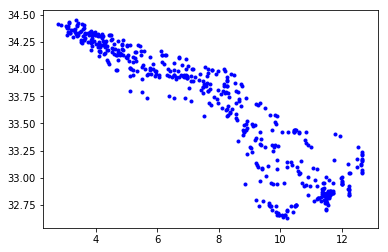

In [6]:
# Extract 'Salnty' and 'T_degC' for the first 500 rows.
# The first 500 row were tested in March, 1949 near California coast
data = bottle[['Salnty', 'T_degC']][:500]
plt.plot(data['T_degC'], data['Salnty'], 'b.')

In [16]:
# data['T_degC'].isna().sum()

AttributeError: 'Series' object has no attribute 'isNA'

In [7]:
data['Salnty'].isnull().sum()

6

In [8]:
data['T_degC'].isnull().sum()

1

In [9]:
print(data.shape)
data = data.dropna()
print(data.shape)

(500, 2)
(493, 2)


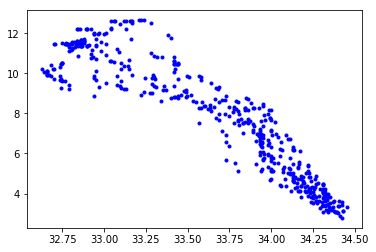

In [10]:
plt.plot(data['Salnty'], data['T_degC'], 'b.')

### Correlation Coefficient
The **Pearson's correlation coefficient** is the covariance of the two variables divided by the product of their standard deviations.

- For a variable $X$ with data set $\{x^{(1)},...,x^{(n)}\}$, its **standard deviation** is calculated as 

$\sigma_X = \sqrt{\sum_{i=1}^n(x^{(i)} - \bar{x})^2}$,

where $\bar{x}$ is the **mean** of $X$,

- For a pair of variables $(X, Y)$ with data set $\{(x^{(1)}, y^{(1)}), ..., (x^{(n)}, y^{(n)})\}$, their **covariance** is calculated as

$cov(X, Y) = \sum_{i=1}^n(x^{(i)} - \bar{x})(y^{(i)} - \bar{y})$.

- The **correlation coefficient** of $X$ and $Y$ is defined as

$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X\sigma_Y}$.

**Questions**:
1. What kind of data set has standard deviation equal to 0?
2. What kind of data set has covariance equal to 0?
3. If the points $(x^{(i)}, y^{(i)})$ are lying on a straight line, what is $\rho_{X, Y}$?

A: if the slope is positive, then correlation coeff = 1; if the slope is negative, the correlation coeff = -1.

4. What data set has $\rho_{X, Y}$ close to 0?

A: When the data spread out and don't have a strong linear relationship.

See https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

## Univariate Linear regression: model representation

In order to figure out how to find the line that best fits the data, we need to specify some notations:

n = number of training examples

$x$: "input" variable - water temperature

$y$: "output" variable - water salinity

Pair $(x^{(i)}, y^{(i)})$ corresponds to the $i$-th data instance.

## Hypothesis of linear regression model:
Hypothesis: the relationship between x and y can be described as a straight line.

Mathematical expression:

$y = m\cdot x + b + noise$ 

### How to choose $m$ and $b$?
On average, for a training example $(x,y)$, the value $mx+b$ should be close to the true value $y$.

How to measure closeness of two values? The measurement:

1. should be small when two values are close, large when two values are far apart.
2. easy to compute, easy to minimize (require derivatives)

One good choice: **mean square error (MSE)**

Mathematical expression:

$\min_{m, b}\frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$

The expression to be minimized is called the cost function of the model.

## Example:

x's: {1, 2, 3}

y's: {1.3, 2.25, 3.75}

Q: for $m=0.4$, $b=0.8$, what is the value for the cost function?

Q: How to minimize the cost function?

Method 1: find closed form solution.

Method 2: use gradient descent

Method 3: use stochastic gradient descent

[[1.         0.99170508]
 [0.99170508 1.        ]]


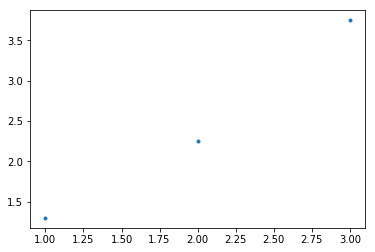

In [35]:
xs = np.array([1, 2, 3])
ys = np.array([1.3, 2.25, 3.75])
# visualize our data set
plt.plot(xs,ys, '.')
# calculate the correlation coeffcient
print(np.corrcoef(xs, ys))

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xs.reshape(3,1) , ys.reshape(3,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(model.coef_)
print(model.intercept_)
m = model.coef_[0, 0]
b = model.intercept_[0]
print(m, b)

[[1.225]]
[-0.01666667]
1.2249999999999996 -0.016666666666666163


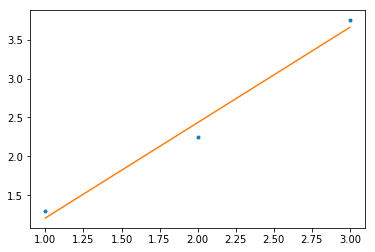

In [36]:
# plot the regression line together with training data
plt.plot(xs, ys,'.')
xs_line = range(1,4)
ys_line = [(i*m+b) for i in xs_line]
plt.plot(xs_line, ys_line)


### Training Method 1: Normal Equation for Linear Regression
The vector $z=(m,b)$ can be obtained directly from x's and y's through the following equation:

$z = (X^T X) ^ {-1} X^T y$.

Here each row of $x$ and $y$ represents a training example. In order to reflect the constant term of linear expression, X should include a second column filled with 1.

This formula is call the **normal equation** of linear regression. It generalizes to the multivariate case, where $X$ may have more than one column. Derivation of normal equation can be found here:https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression

In [44]:
# Construct matrix X and vector y
print(xs.reshape([3, 1]))
print(np.ones([3, 1]))

X = np.hstack([xs.reshape([3, 1]), np.ones([3, 1])])
print(X)

[[1]
 [2]
 [3]]
[[1.]
 [1.]
 [1.]]
[[1. 1.]
 [2. 1.]
 [3. 1.]]


In [45]:
y = ys.reshape([3, 1])
print(y)

[[1.3 ]
 [2.25]
 [3.75]]


In [47]:
z = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(z)

[[ 1.225     ]
 [-0.01666667]]


### Training Method 2: (Batch) Gradient Descent
The analytical method involves solving linear system of equations, which has complexity $O(n^3)$. When the size of data set is large (>1 million), this method is going to take a long time to find the results. Also, not every machine learning model has a formula that directly computes the best values for parameters. *Gradient Descent* is an optimization method that is suitable for most machine learning models.

#### Gradient Descent Algorithm

repeat until converge{

    parameter = paramter - learning rate * gradient
    
}

1. Gradient is the vector of partial derivatives
2. Parameters should be updated simultanously.
3. Stopping criterion: set a maximum number of iteration, or stop when the different between the new cost and the previous cost is less than a threshold (e.g. $10^{-6}$)

For cost function 

$J(m, b) = \frac{1}{n}\sum_{i=1}^{n}(mx^{(i)} + b - y^{(i)})^2$,

its gradient is $(\frac{\partial J}{\partial m}, \frac{\partial J}{\partial b})$, and

$\frac{\partial J}{\partial m} = \frac{1}{n}\sum_{i=1}^{n} 2x^{(i)}(mx^{(i)} + b - y^{(i)})$,

$\frac{\partial J}{\partial b} = \frac{1}{n}\sum_{i=1}^{n} 2(mx^{(i)} + b - y^{(i)})$.

In [58]:
xs = np.array([1, 2, 3])
ys = np.array([1.3, 2.25, 3.75])

learning_rate = 0.1

# Take a random initial guess
m = 1.0
b = 2.0

for i in range(1000):
    # Calculate the value of loss function
    if i % 10 == 0:
        print('i:', i)
        print('Loss: ', np.mean([(m*xs[k] + b - ys[k])**2 for k in range(len(xs))]))
        print('parameters:', m, b)
    # Calculate the two derivatives
    der_m = np.mean([2*xs[k]*(m*xs[k] + b - ys[k]) for k in range (len(ys))])
#     print(der_m)
    der_b = np.mean([2 *(m*xs[k] + b -ys[k])for k in range(len(xs))])
#     print(der_b)

    # Modify our guesses
    m = m - learning_rate * der_m
    b = b - learning_rate * der_b

    


i: 0
Loss:  2.505
parameters: 1.0 2.0
i: 10
Loss:  0.29388008678767247
parameters: 0.6136438914137778 1.373089467570496
i: 20
Loss:  0.18711670661686716
parameters: 0.7456888911945255 1.0729201455685136
i: 30
Loss:  0.12149178581585111
parameters: 0.849213881652529 0.837583508742113
i: 40
Loss:  0.08115370150970012
parameters: 0.9303788152446705 0.653076536895915
i: 50
Loss:  0.05635883660732651
parameters: 0.9940131745995663 0.5084206808467533
i: 60
Loss:  0.041118020487726954
parameters: 1.0439033366596517 0.3950086158178022
i: 70
Loss:  0.03174985184046757
parameters: 1.0830178699969013 0.3060920876838862
i: 80
Loss:  0.025991460484336093
parameters: 1.1136841708268768 0.23638037779330917
i: 90
Loss:  0.02245191372136539
parameters: 1.1377269479319014 0.18172549418664377
i: 100
Loss:  0.020276238170255742
parameters: 1.1565767966347773 0.13887535743419677
i: 110
Loss:  0.018938901945963735
parameters: 1.1713553222006545 0.10528029513532668
i: 120
Loss:  0.018116873047449182
paramete

In [59]:
print('m, b:', m, b)
print(model.coef_[0, 0], model.intercept_[0])

m, b: 1.2249999999788994 -0.01666666661870004
1.2249999999999996 -0.016666666666666163


### Training Method 3: Stochastic Gradient Descent
When the dataset is extremely large (> 1 million samples, each with hundreds of features), even gradient descent algorithm is too costly. Researchers have found that gradient descent will become much more efficient if the gradient and the cost is approximated by that of a single randomly-chosen data example. This variation of gradient descent algorithm is called **stochastic gradient descent** (SGD).

## Visualize Gradient Descent
1. plot the change of the average cost.

2. plot the line after each iteration (use dashed line to represent the initial guess)

3. show the change of parameters on the contour plot.

In [64]:
xs = np.array([1, 2, 3])
ys = np.array([1.3, 2.25, 3.75])

learning_rate = 0.1

# Take a random initial guess
m = 1.0
b = 2.0

for i in range(1000):
    # Calculate the value of loss function
    rand_ind = [np.random.choice(np.arange(len(xs)))]
    if i % 10 == 0:
        print('i:', i)
        
        print('Loss: ', np.mean([(m*xs[k] + b - ys[k])**2 for k in rand_ind]))
        print('parameters:', m, b)
    # Calculate the two derivatives
    der_m = np.mean([2*xs[k]*(m*xs[k] + b - ys[k]) for k in rand_ind])
#     print(der_m)
    der_b = np.mean([2 *(m*xs[k] + b -ys[k])for k in rand_ind])
#     print(der_b)

    # Modify our guesses
    m = m - learning_rate * der_m
    b = b - learning_rate * der_b

i: 0
Loss:  3.0625
parameters: 1.0 2.0
i: 10
Loss:  0.9119970561500497
parameters: 0.5450146303999999 1.1599707391999998
i: 20
Loss:  0.8404964869478848
parameters: 0.583214045184 1.083571909632
i: 30
Loss:  0.0
parameters: 0.6657312515074949 0.9185374969850103
i: 40
Loss:  0.8229153057242179
parameters: 1.1761896013505129 1.0309571925721785
i: 50
Loss:  0.4308904017380827
parameters: 0.8435775737087567 0.5628448525824865
i: 60
Loss:  0.40576302897719146
parameters: 0.8996342923858766 0.41410180969070254
i: 70
Loss:  0.12083356841408426
parameters: 1.300530837396774 0.3470803943177438
i: 80
Loss:  0.20999220417756304
parameters: 1.3167003746091936 0.25814793964943555
i: 90
Loss:  7.888609052210118e-31
parameters: 1.0565576630995817 0.13688467380083602
i: 100
Loss:  0.17251306667075206
parameters: 1.084653076728921 0.08069384654215761
i: 110
Loss:  0.03830118628725099
parameters: 1.1457068887066852 -0.04141377741337063
i: 120
Loss:  0.03262088648549529
parameters: 1.1983422306246756 0.0

## Homework

Use each of the four following methods to train a univariate linear regression model on the *data* data frame generated at the beginning of the class:

1. Use LinearRegression() from sklearn.linear_model
2. Apply the normal equation
3. Use batch gradient descent
4. Use stochastic gradient descent

They should all produce the same training result. Visualize the regression line along with training data.

In [11]:
# show the data
data.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [15]:
data['Salnty'].head() # This give you a Pandas Series, a one dimensional data structure

0    33.440
1    33.440
2    33.437
3    33.420
4    33.421
Name: Salnty, dtype: float64

In [16]:
data[['Salnty']].head() # This gives a data frame (2 dimensional array)

,Salnty
0,33.440
1,33.440
2,33.437
3,33.420
4,33.421


In [22]:
# Method 1: sklearn
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(data[['T_degC']], data['Salnty'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Visualize the training line
m = model1.coef_[0] # slope
b = model1.intercept_ # intercept
# determine the range of values
print("range of salinity:", data['Salnty'].max(), data['Salnty'].min())
print("range of temperature:", data['T_degC'].max(), data['T_degC'].min())



range of salinity: 34.45 32.63
range of temperature: 12.66 2.78


In [28]:
def plot_regression(data, m, b):
    # sample points to plot the regression line
    x_samples = np.linspace(2, 13, 100) # sample 100 values from 2 to 13
    # use y = mx + b to get the corresponding y values
    y_samples = x_samples * m + b

    # plot the line
    plt.plot(x_samples, y_samples, 'b-', label="regression line")

    # plot the training data
    plt.plot(data['T_degC'], data['Salnty'], 'g.', label="training data")

    plt.xlabel("Water Temperature")
    plt.ylabel("Salinity")
    plt.title("Water Temperature vs. Salinity")
    plt.xlim(2, 13)
    # plt.ylim()
    plt.legend(loc='upper right')
    plt.show()

    print("m:", m, "b:", b)

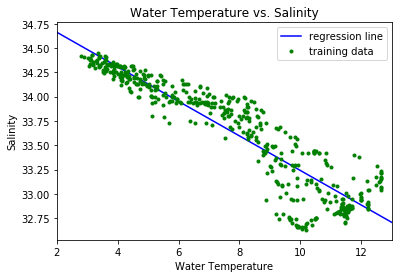

m: -0.17757761567999122 b: 35.017088956651016


In [29]:
plot_regression(data, m, b)

In [25]:
# Method 2: Normal Equation
# X <- [1, T_degC]
# y <- Salinity

# Add a column of ones
data['Column of ones'] = 1
data.head()

,Salnty,T_degC,Column of ones
0,33.440,10.50,1
1,33.440,10.46,1
2,33.437,10.46,1
3,33.420,10.45,1
4,33.421,10.45,1


In [26]:
X = data[['Column of ones', 'T_degC']]
y = data['Salnty']

result = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

b = result[0]
m = result[1]

print(m, b)

-0.17757761567998717 35.01708895665099


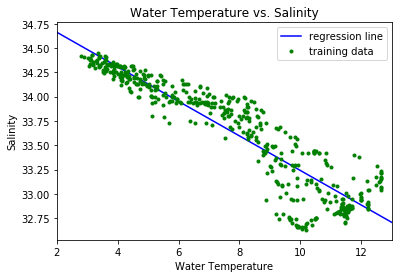

m: -0.17757761567999122 b: 35.017088956651016


In [30]:
plot_regression(data, m, b)

In [53]:
# Method 3: (Batch) Gradient Descent

def gradient_descent(data, m, b, learning_rate):
    
    # Evaluate the loss function at (m, b)
    data['Predicted Salinity'] = data['T_degC'] * m + b
    # data.head()

    data['Square Error'] = (data['Predicted Salinity'] - data['Salnty']) ** 2
    # data.head()

    loss = data['Square Error'].mean()
#     print("loss: ", loss)

    # Calculate the gradient of the loss function
    # partial derivative with respect to m = average of [2 * x * error]
    # partial derivative with respect to b = average of [2 * error]
    data['Error'] = data['Predicted Salinity'] - data['Salnty']
    # data.head()
    der_b = (2 * data['Error']).mean()

    data['Temp * Error'] = data['T_degC'] * data['Error']
    # data.head()
    der_m = (2 * data['Temp * Error']).mean()

#     print('Gradient:', der_m, der_b)

    # update (m, b) using gradient
#     learning_rate = 0.05

    m = m - learning_rate * der_m
    b = b - learning_rate * der_b
    
    return m, b, loss

In [60]:
# Start with an initial value for m, b
m = 1
b = 2

losses = []

# Perform 100 iterations of gradient descent
num_iter = 3000
for i in range(num_iter):
    m, b, loss = gradient_descent(data, m, b, 0.01)
    losses.append(loss)

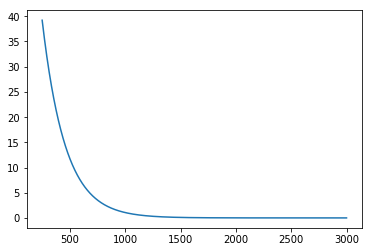

In [61]:
plt.plot(np.arange(250, num_iter), losses[250:])

In [62]:
print(m, b)

-0.1748835086058024 34.99313874113906


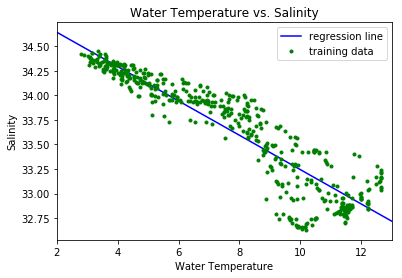

m: -0.1748835086058024 b: 34.99313874113906


In [63]:
plot_regression(data, m, b)

In [64]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64', length=493)

In [65]:
samples = np.random.choice(data.index, 5)
print(samples)

[489  32 345 391  31]


In [68]:
data_sub = data.loc[samples]
data_sub

,Salnty,T_degC,Column of ones,Predicted Salinity,Square Error,Error,Temp * Error
489,34.000,7.13,1,33.746208,0.064410,-0.253792,-1.809538
32,32.950,9.69,1,33.298523,0.121468,0.348523,3.377185
345,32.896,11.38,1,33.002981,0.011445,0.106981,1.217439
391,33.686,7.69,1,33.648277,0.001423,-0.037723,-0.290092
31,32.939,9.75,1,33.288030,0.121822,0.349030,3.403044


In [69]:
# Method 4: Stochastic Gradient Descent
def sgd(data, m, b, learning_rate, num_samples):
    
    # Create a sub data frame
    sample_indices = np.random.choice(data.index, num_samples, replace=False)
    data_sub = data.loc[sample_indices]
    
    # Evaluate the loss function at (m, b)
    data_sub['Predicted Salinity'] = data_sub['T_degC'] * m + b

    data_sub['Square Error'] = (data_sub['Predicted Salinity'] - data_sub['Salnty']) ** 2

    loss = data_sub['Square Error'].mean()

    # Calculate the gradient of the loss function
    # partial derivative with respect to m = average of [2 * x * error]
    # partial derivative with respect to b = average of [2 * error]
    data_sub['Error'] = data_sub['Predicted Salinity'] - data_sub['Salnty']
    # data.head()
    der_b = (2 * data_sub['Error']).mean()

    data_sub['Temp * Error'] = data_sub['T_degC'] * data_sub['Error']

    der_m = (2 * data_sub['Temp * Error']).mean()

    m = m - learning_rate * der_m
    b = b - learning_rate * der_b
    
    return m, b, loss

In [71]:
# Start with an initial value for m, b
m = 1
b = 2

num_samples = 10

losses = []

# Perform 100 iterations of stochastic gradient descent
num_iter = 3000
for i in range(num_iter):
    m, b, loss = sgd(data, m, b, 0.01, num_samples)
    losses.append(loss)

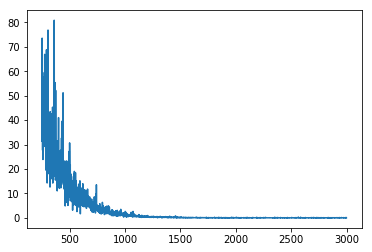

In [72]:
plt.plot(np.arange(250, num_iter), losses[250:])

In [73]:
print(m, b)

-0.19440027095675436 34.99223111496402


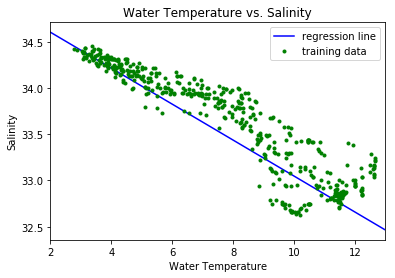

m: -0.19440027095675436 b: 34.99223111496402


In [74]:
plot_regression(data, m, b)